<h1 style="color:Brown">Healthcare</h1>
<h3 style="color:red">Problem Statement</h3>
<p>NIDDK (National Institute of Diabetes and Digestive and Kidney Diseases) research creates knowledge about and treatments for the most chronic, costly, and consequential diseases.
The dataset used in this project is originally from NIDDK. The objective is to predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.
Build a model to accurately predict whether the patients in the dataset have diabetes or not.</p>

In [1]:
### import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
import seaborn as sns  


<h3>*************** Function start here **********************</h3>

In [2]:
#This function will draw histogram by passing data column name and tilte name
def plot_histogram(data_val,title_name):
    plt.figure(figsize=[10,6])
    plt.hist(data_val,edgecolor="red")
    #plt.grid(axis='y', alpha=0.75)
    plt.title(title_name,fontsize=15)
    plt.show()
    

In [3]:
#function to get total count of zeros and outcome details together
def get_zeros_outcome_count(data,column_name):
    count = data[data[column_name] == 0].shape[0]
    print("Total No of zeros found in " + column_name + " : " + str(count))
    print(data[data[column_name] == 0].groupby('Outcome')['Age'].count())

In [4]:
#function to create scatter plot
def create_scatter_plot(first_value,second_value,x_label,y_label,colour):
    plt.scatter(first_value,second_value, color=[colour])
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    title_name = x_label + '&' + y_label
    plt.title(title_name)
    plt.show()

<h3>*************** Function End here **********************</h3>

In [5]:
diabetes_data = pd.read_csv("health care diabetes.csv")

In [6]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<p>Here we need to predict outcome column. 1 indicate person is diabetes and 0 denote person is non-diabetes.</p>

In [7]:
#Get count of outcome column
diabetes_data.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

In [8]:
#checking null value
diabetes_data.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [9]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
#Now lets create a count (frequency) plot describing the data types and the count of variables. 

In [11]:
diabetes_data['Glucose'].value_counts().head(10)

100    17
99     17
129    14
125    14
111    14
106    14
95     13
108    13
105    13
102    13
Name: Glucose, dtype: int64

In [12]:
diabetes_data['Glucose']

0      148
1       85
2      183
3       89
4      137
      ... 
763    101
764    122
765    121
766    126
767     93
Name: Glucose, Length: 768, dtype: int64

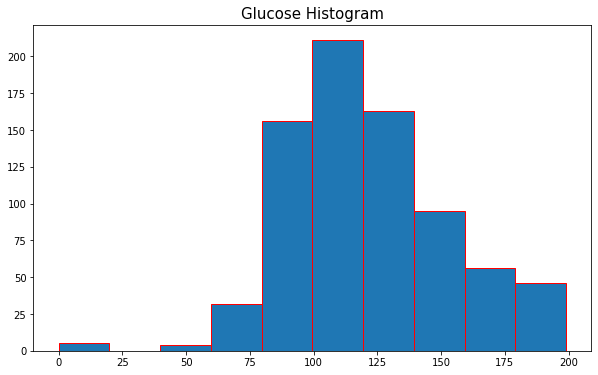

In [13]:
#Drawing histogram for glucose
plot_histogram(diabetes_data['Glucose'],'Glucose Histogram')

In [14]:
#Now will check for another column bloodpressure
diabetes_data['BloodPressure'].value_counts().head(7)

70    57
74    52
68    45
78    45
72    44
64    43
80    40
Name: BloodPressure, dtype: int64

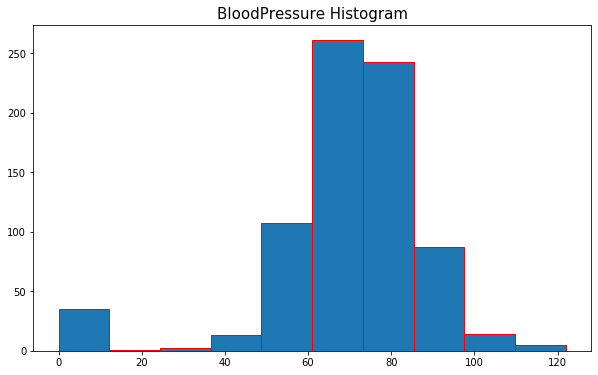

In [15]:
#Drawing Bloodpressure histogram
plot_histogram(diabetes_data['BloodPressure'],'BloodPressure Histogram')

<h3>Instead of creating historam one by one. With the help of group by and Outcome we can create all column hisotram</h3>

Outcome
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

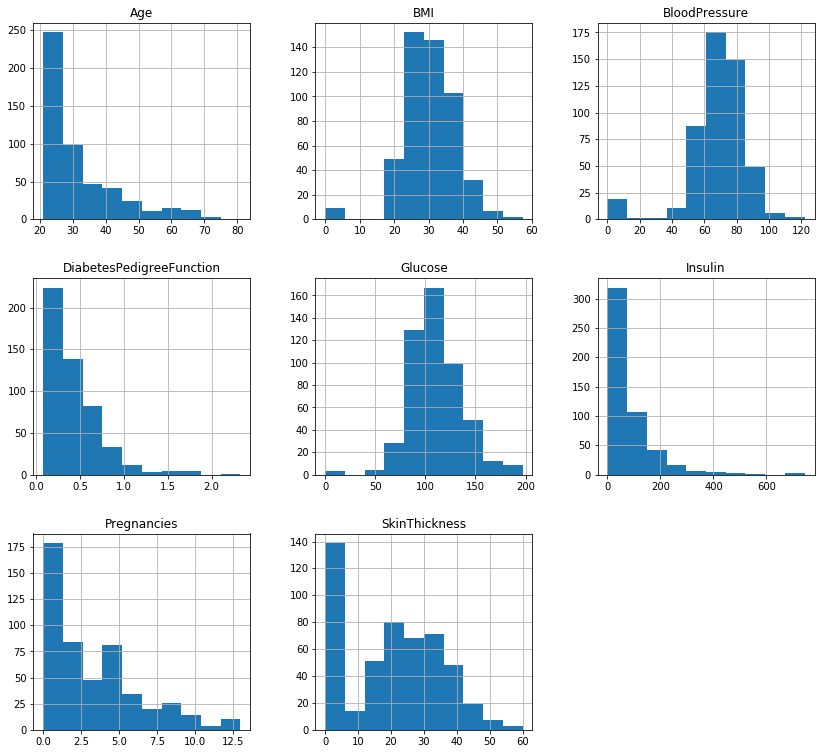

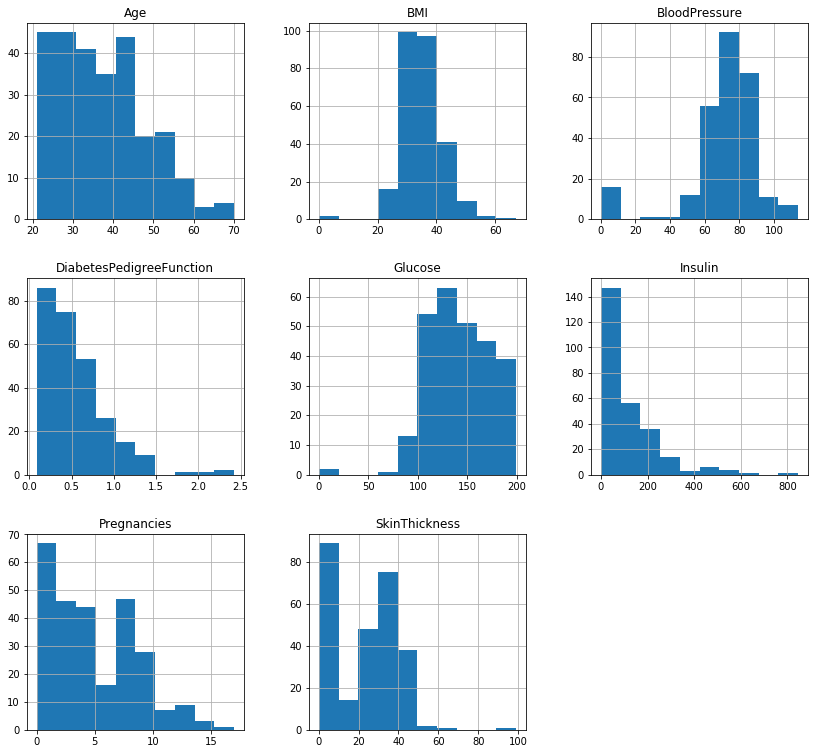

In [16]:
diabetes_data.groupby('Outcome').hist(figsize=(14, 13))

<h4 style="color:blue">After analyzing the histogram we can identify that there are some outliers in some columns.</h4>
<b>For Example:- </b>
<ul>
    <li>BloodPressure - A living person cannot have a diastolic blood pressure of zero.</li>
    <li>Plasma glucose levels - Zero is invalid number as fasting glucose level would never be as low as zero. </li>
    <li>Skin Fold Thickness - For normal people, skin fold thickness can’t be less than 10 mm better yet zero. </li>
    <li>BMI: Should not be 0 or close to zero unless the person is really underweight which could be life-threatening.</li>
    <li>Insulin: In a rare situation a person can have zero insulin but by observing</li>
</ul>

In [17]:
#Checking count of zeros in blood pressure
get_zeros_outcome_count(diabetes_data,'BloodPressure')

Total No of zeros found in BloodPressure : 35
Outcome
0    19
1    16
Name: Age, dtype: int64


In [18]:
#Checking count of zeros in Glucose
get_zeros_outcome_count(diabetes_data,'Glucose')

Total No of zeros found in Glucose : 5
Outcome
0    3
1    2
Name: Age, dtype: int64


In [19]:
#Checking count of zeros in SkinThickness 
get_zeros_outcome_count(diabetes_data,'SkinThickness')

Total No of zeros found in SkinThickness : 227
Outcome
0    139
1     88
Name: Age, dtype: int64


In [20]:
#Checking count of zeros in BMI 
get_zeros_outcome_count(diabetes_data,'BMI')

Total No of zeros found in BMI : 11
Outcome
0    9
1    2
Name: Age, dtype: int64


In [21]:
#Checking count of zeros in BMI 
get_zeros_outcome_count(diabetes_data,'Insulin')

Total No of zeros found in Insulin : 374
Outcome
0    236
1    138
Name: Age, dtype: int64


<h4>After analysing above data we found lots of 0 in Insulin and SkinThickness and removing them or putting mean value will not good dataset. However, we can remove "BloodPressure", "BMI" and "Glucose" zeros row</h4>

In [22]:
diabetes_data_mod = diabetes_data[(diabetes_data.BloodPressure != 0) & (diabetes_data.BMI != 0) & (diabetes_data.Glucose != 0)]
print(diabetes_data_mod.shape)

(724, 9)


In [23]:
#Now we will check the stats of data after removing BloodPressure, BMI and Glucose 0 rows
diabetes_data_mod.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,724.0,3.866022,3.362803,0.000,1.000,3.000,6.0000,17.00
Glucose,724.0,121.882597,30.750030,44.000,99.750,117.000,142.0000,199.00
BloodPressure,724.0,72.400552,12.379870,24.000,64.000,72.000,80.0000,122.00
SkinThickness,724.0,21.443370,15.732756,0.000,0.000,24.000,33.0000,99.00
Insulin,724.0,84.494475,117.016513,0.000,0.000,48.000,130.5000,846.00
BMI,724.0,32.467127,6.888941,18.200,27.500,32.400,36.6000,67.10
DiabetesPedigreeFunction,724.0,0.474765,0.332315,0.078,0.245,0.379,0.6275,2.42
Age,724.0,33.350829,11.765393,21.000,24.000,29.000,41.0000,81.00
Outcome,724.0,0.343923,0.475344,0.000,0.000,0.000,1.0000,1.00


<h2>Data Exploration:</h2>

1. Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.

2. Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

3. Perform correlation analysis. Visually explore it using a heat map.

In [24]:
#Lets create positive variable and store all 1 value Outcome data
Positive = diabetes_data_mod[diabetes_data_mod['Outcome']==1]
Positive.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1


Outcome
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

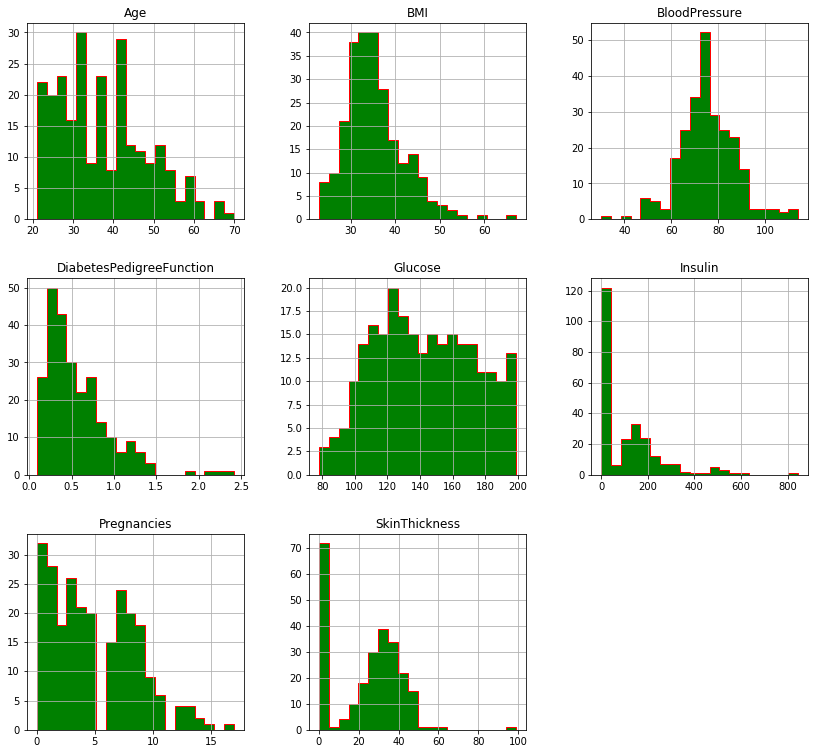

In [25]:
Positive.groupby('Outcome').hist(figsize=(14, 13),histtype='stepfilled',bins=20,color="green",edgecolor="red")

<p>From positive outcome histogram we can see the outlier in SkinThickness, BMI & Insulin. </p>

<h3>Now creating scatter plot for positive outcome</h3>

In [26]:
BloodPressure = Positive['BloodPressure']
Glucose = Positive['Glucose']
SkinThickness = Positive['SkinThickness']
Insulin = Positive['Insulin']
BMI = Positive['BMI']

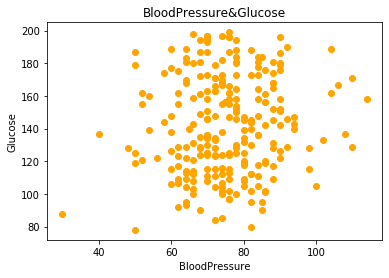

In [27]:
create_scatter_plot(Positive['BloodPressure'],Positive['Glucose'],'BloodPressure','Glucose','orange')

In [28]:
#Creating scatter plot for negative outcome
Negative = diabetes_data_mod[diabetes_data_mod['Outcome']==0]

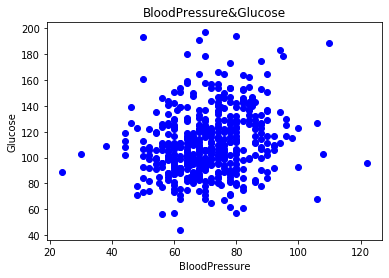

In [29]:
create_scatter_plot(Negative['BloodPressure'],Negative['Glucose'],'BloodPressure','Glucose','blue')

<p>We don't need to create negative scatter plot, but I am creating it to verify the values and points which we will get for both outcome value using sns scatterplot. </p>


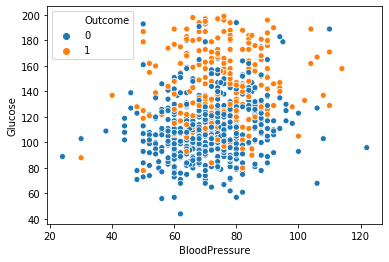

In [30]:
g =sns.scatterplot(x= "BloodPressure" ,y= "Glucose",
              hue="Outcome",
              data=diabetes_data_mod);

<p>As you can compare postive & negative scatter plot with sns scatter plot all the value is matching, so now I will create common scatter plot for both outcome.</p>

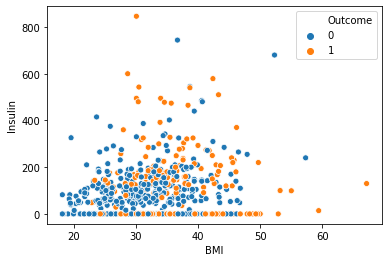

In [31]:
B =sns.scatterplot(x= "BMI" ,y= "Insulin",
              hue="Outcome",
              data=diabetes_data_mod);

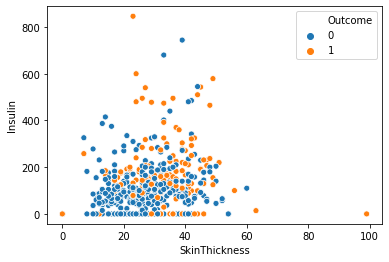

In [32]:
S =sns.scatterplot(x= "SkinThickness" ,y= "Insulin",
              hue="Outcome",
              data=diabetes_data_mod);

In [33]:
### correlation matrix
diabetes_data_mod.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.134915,0.209668,-0.095683,-0.080059,0.012342,-0.025996,0.557066,0.224417
Glucose,0.134915,1.000000,0.223331,0.074381,0.337896,0.223276,0.136630,0.263560,0.488384
BloodPressure,0.209668,0.223331,1.000000,0.011777,-0.046856,0.287403,-0.000075,0.324897,0.166703
SkinThickness,-0.095683,0.074381,0.011777,1.000000,0.420874,0.401528,0.176253,-0.128908,0.092030
Insulin,-0.080059,0.337896,-0.046856,0.420874,1.000000,0.191831,0.182656,-0.049412,0.145488
BMI,0.012342,0.223276,0.287403,0.401528,0.191831,1.000000,0.154858,0.020835,0.299375
DiabetesPedigreeFunction,-0.025996,0.136630,-0.000075,0.176253,0.182656,0.154858,1.000000,0.023098,0.184947
Age,0.557066,0.263560,0.324897,-0.128908,-0.049412,0.020835,0.023098,1.000000,0.245741
Outcome,0.224417,0.488384,0.166703,0.092030,0.145488,0.299375,0.184947,0.245741,1.000000


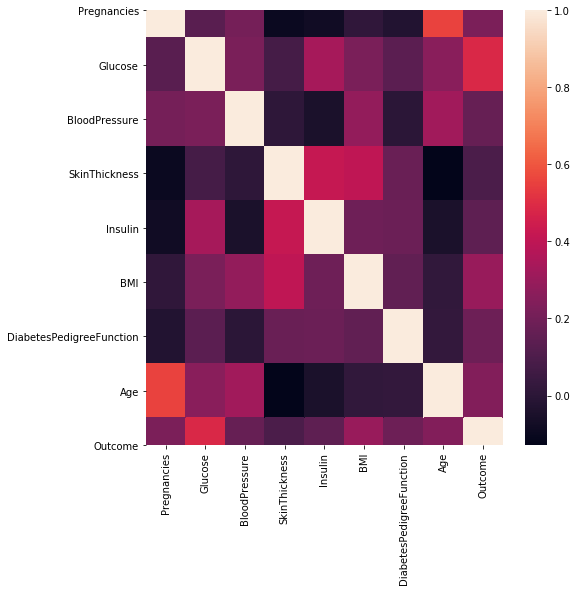

In [34]:
### create correlation heat map
plt.subplots(figsize=(8,8))
sns.heatmap(diabetes_data_mod.corr())

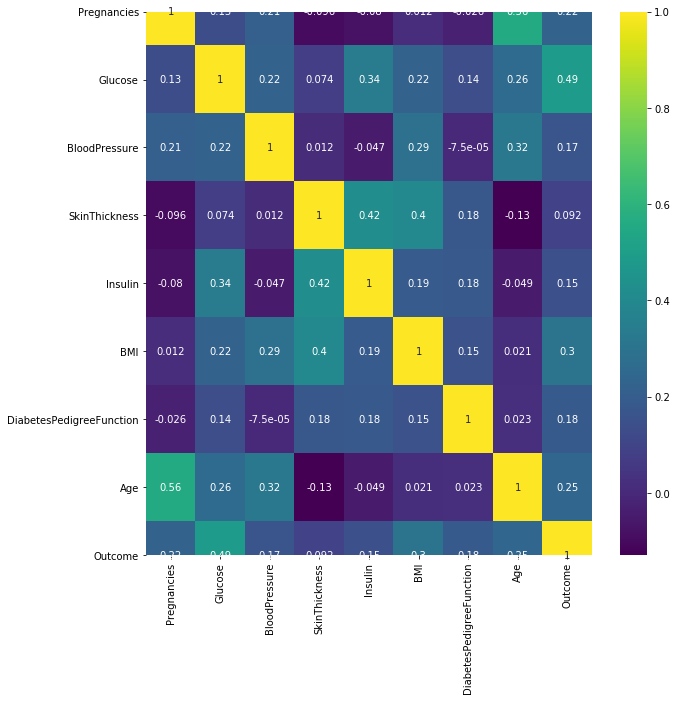

In [35]:
### gives correlation value
plt.subplots(figsize=(10,10))
sns.heatmap(diabetes_data_mod.corr(),annot=True,cmap='viridis')

<h3>Logistic Regreation and model building</h3>

In [36]:
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = diabetes_data_mod[feature_names]
y = diabetes_data_mod.Outcome


In [37]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [38]:
#Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state =10)

<h3>Create Model</h3>

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [55]:
#LR Model
model_LR = LogisticRegression()
model_LR.fit(X_train,y_train) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
#now check LR model score and accuracy score 

print("LogisticRegression Score :{}".format(model_LR.score(X_train,y_train)))
y_pred = model_LR.predict(X_test)
scores = (accuracy_score(y_test, y_pred))
print("LogisticRegression Accuracy Score :{}".format(scores))

LogisticRegression Score :0.770293609671848
LogisticRegression Accuracy Score :0.8


In [57]:
accuracyScores = []
modelScores = []
models = []
names = []
#Store algorithm into array to get score and accuracy
models.append(('LR', LogisticRegression()))
models.append(('SVC', SVC()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))

In [58]:
#We fit each model in a loop and calculate the accuracy of the respective model using the “accuracy_score”
for name, model in models:
    model.fit(X_train, y_train)
    modelScores.append(model.score(X_train,y_train))
    y_pred = model.predict(X_test)
    accuracyScores.append(accuracy_score(y_test, y_pred))
    names.append(name)
    
tr_split_data = pd.DataFrame({'Name': names, 'Score': modelScores,'Accuracy Score': accuracyScores})
print(tr_split_data)

  Name     Score  Accuracy Score
0   LR  0.770294        0.800000
1  SVC  1.000000        0.668966
2  KNN  0.804836        0.731034
3   DT  1.000000        0.717241
4  GNB  0.751295        0.793103
5   RF  0.989637        0.765517
6   GB  0.929188        0.751724


In [59]:
#Lets draw graph to understand more. 

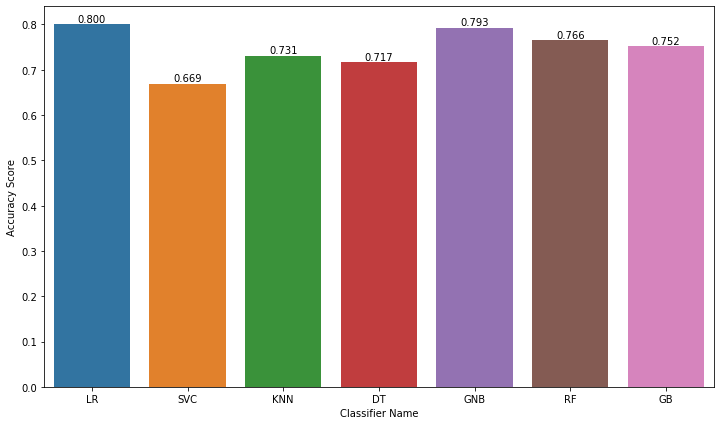

In [60]:
plt.subplots(figsize=(12,7))
axis = sns.barplot(x = 'Name', y = 'Accuracy Score', data = tr_split_data)
axis.set(xlabel='Classifier Name', ylabel='Accuracy Score')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.3f}'.format(height), ha="center")
    
plt.show()

<h3>Now lets perform K-Fold Cross Validation with Scikit Learn </h3>
<p> We will move forward with K-Fold cross validation as it is more accurate and use the data efficiently. We will train the models using 10 fold cross validation and calculate the mean accuracy of the models. <span style="color:blue">"k_fold_cross_val_score"</span> provides its own training and accuracy calculation interface.</p>

In [61]:
names = []
scores = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=10) 
    score = cross_val_score(model, X, y, cv=kfold, scoring='accuracy').mean()
    names.append(name)
    scores.append(score)
k_fold_cross_val_score = pd.DataFrame({'Name': names, 'Score': scores})
print(k_fold_cross_val_score)

  Name     Score
0   LR  0.766781
1  SVC  0.656279
2  KNN  0.719787
3   DT  0.687938
4  GNB  0.757021
5   RF  0.750133
6   GB  0.777816


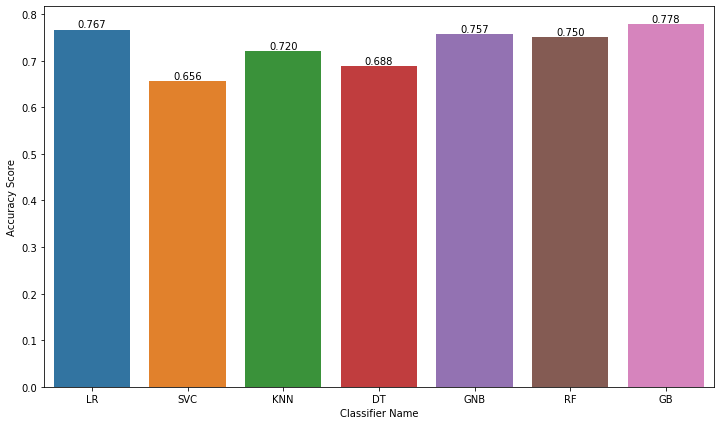

In [62]:
plt.subplots(figsize=(12,7))
axis = sns.barplot(x = 'Name', y = 'Score', data = k_fold_cross_val_score)
axis.set(xlabel='Classifier Name', ylabel='Accuracy Score')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.3f}'.format(height), ha="center")
    
plt.show()

<p>We can see the Logistic Regression, Gaussian Naive Bayes, Random Forest and Gradient Boosting have performed better than the rest. From the base level we can observe that the Logistic Regression performs better than the other algorithms.</p>

At the baseline Logistic Regression managed to achieve a classification accuracy of 77.64 %.

<b>Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc -</b>
AUC-ROC curve helps us visualize how well our machine learning classifier is performing.

<h4> Now lets check confussion matric</h4>

In [63]:
#y is label value & X is feature value
cm = confusion_matrix(y,model_LR.predict(X))
cm

array([[427,  48],
       [114, 135]], dtype=int64)

In [64]:
print(classification_report(y,model_LR.predict(X)))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       475
           1       0.74      0.54      0.62       249

    accuracy                           0.78       724
   macro avg       0.76      0.72      0.73       724
weighted avg       0.77      0.78      0.77       724



In [65]:

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


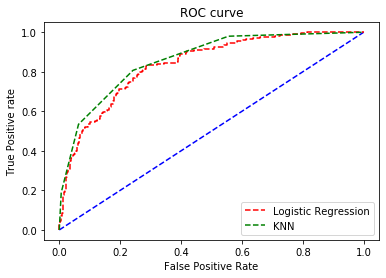

AUC LR: 0.83806 AUC KNN: 0.86121


In [66]:
#Preparing ROC Curve (Receiver Operating Characteristics Curve) - LR, KNN
# predict probabilities for LR
probs_LR = model_LR.predict_proba(X)
# predict probabilities for KNN - where models[2] is KNN 
model_KNN = KNeighborsClassifier(n_neighbors=4)
model_KNN.fit(X_train, y_train)
probs_KNN = model_KNN.predict_proba(X)

# Sklearn has a very potent method roc_curve() which computes the ROC for your classifier in a matter of seconds! It returns the FPR, TPR, and threshold values: calculate roc curve
fpr, tpr, thresholds = roc_curve(y, probs_LR[:, 1],pos_label=1)
fpr1, tpr1, thresholds1 = roc_curve(y, probs_KNN[:, 1],pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y))]
p_fpr, p_tpr, _ = roc_curve(y, random_probs, pos_label=1)

# plot no skill
plt.plot(p_fpr, p_tpr, linestyle='--',color='blue')
plt.plot(fpr, tpr, linestyle='--',color='red', label='Logistic Regression')
plt.plot(fpr1, tpr1, linestyle='--',color='green', label='KNN')

# plot the roc curve for the model
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
#plt.plot(fpr, tpr, marker='.')
plt.legend(loc='best')
plt.show();
# keep probabilities for the positive outcome only
#The AUC score can be computed using the roc_auc_score() method of sklearn: calculate AUC
auc_LR = roc_auc_score(y, probs_LR[:, 1])
auc_KNN = roc_auc_score(y, probs_KNN[:, 1])
print('AUC LR: %.5f' % auc_LR, 'AUC KNN: %.5f' % auc_KNN)


In [67]:
def generate_graph(recall, precision,name):    
    # plot no skill
    # plot the precision-recall curve for the model
    plt.figure()
    plt.subplots(figsize=(10,4))
    plt.plot([0, 1], [0.5, 0.5], linestyle='--',label='No Skill')
    plt.plot(recall, precision, marker='.',label=name)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(name)
    plt.legend(loc='best')
    plt.show()


===================------------------- Precision Recall Curve for LR -------------------===================



<Figure size 432x288 with 0 Axes>

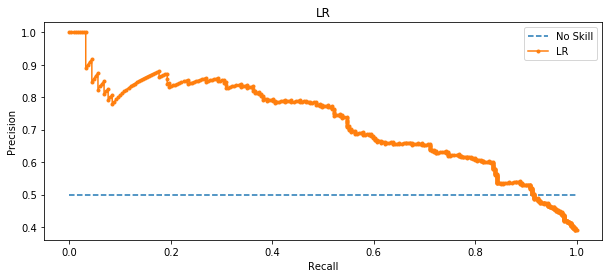

LR calculated value : F1 Score =0.625, Area Under the Curve=0.722, Average Precision=0.723

The above precision-recall curve plot is showing the precision/recall for each threshold for a LR model (orange) compared to a no skill model (blue).

===================------------------- Precision Recall Curve for KNN -------------------===================



<Figure size 432x288 with 0 Axes>

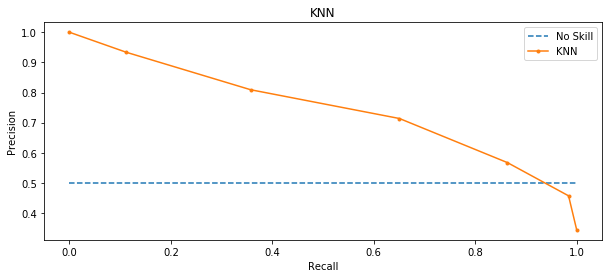

KNN calculated value : F1 Score =0.681, Area Under the Curve=0.750, Average Precision=0.694

The above precision-recall curve plot is showing the precision/recall for each threshold for a KNN model (orange) compared to a no skill model (blue).

===================------------------- Precision Recall Curve for DT -------------------===================



<Figure size 432x288 with 0 Axes>

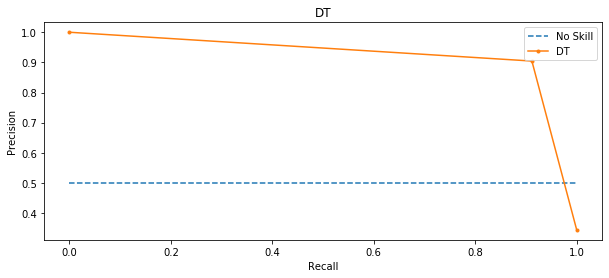

DT calculated value : F1 Score =0.908, Area Under the Curve=0.923, Average Precision=0.855

The above precision-recall curve plot is showing the precision/recall for each threshold for a DT model (orange) compared to a no skill model (blue).

===================------------------- Precision Recall Curve for GNB -------------------===================



<Figure size 432x288 with 0 Axes>

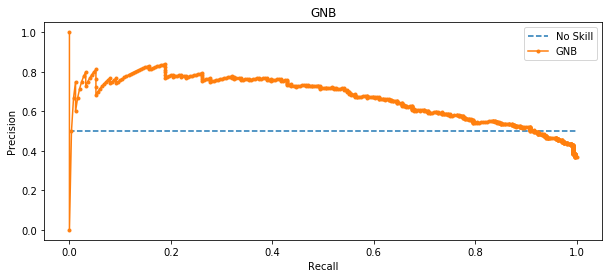

GNB calculated value : F1 Score =0.637, Area Under the Curve=0.671, Average Precision=0.674

The above precision-recall curve plot is showing the precision/recall for each threshold for a GNB model (orange) compared to a no skill model (blue).

===================------------------- Precision Recall Curve for RF -------------------===================



<Figure size 432x288 with 0 Axes>

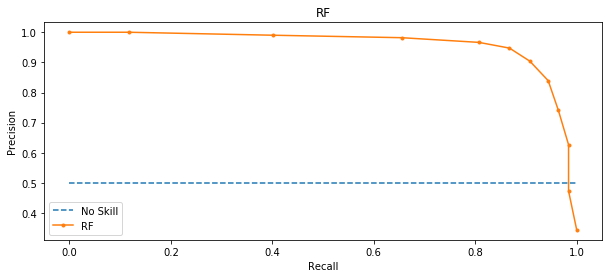

RF calculated value : F1 Score =0.906, Area Under the Curve=0.961, Average Precision=0.951

The above precision-recall curve plot is showing the precision/recall for each threshold for a RF model (orange) compared to a no skill model (blue).

===================------------------- Precision Recall Curve for GB -------------------===================



<Figure size 432x288 with 0 Axes>

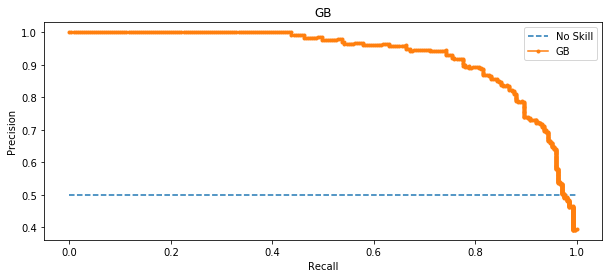

GB calculated value : F1 Score =0.834, Area Under the Curve=0.929, Average Precision=0.929

The above precision-recall curve plot is showing the precision/recall for each threshold for a GB model (orange) compared to a no skill model (blue).


In [68]:
#Store algorithm into array to get score and accuracy
p_r_Models = []
p_r_Models.append(('LR', LogisticRegression()))
p_r_Models.append(('KNN', KNeighborsClassifier()))
p_r_Models.append(('DT', DecisionTreeClassifier()))
p_r_Models.append(('GNB', GaussianNB()))
p_r_Models.append(('RF', RandomForestClassifier()))
p_r_Models.append(('GB', GradientBoostingClassifier()))
#Precision Recall Curve for All classifier
for name, model in p_r_Models:
    from sklearn.metrics import precision_recall_curve
    from sklearn.metrics import f1_score
    from sklearn.metrics import auc
    from sklearn.metrics import average_precision_score
    print("\n===================------------------- Precision Recall Curve for {} -------------------===================\n".format(name))
    model.fit(X_train, y_train)
    # predict probabilities
    probs = model.predict_proba(X)
    # keep probabilities for the positive outcome only
    probs = probs[:, 1]
    # predict class values
    yhat = model.predict(X)
    # calculate precision-recall curve
    precision, recall, thresholds = precision_recall_curve(y, probs)
    # calculate F1 score, # calculate precision-recall AUC
    f1, auc = f1_score(y, yhat), auc(recall, precision)
    # calculate average precision score
    ap = average_precision_score(y, probs)
    generate_graph(recall, precision,name)
    print(str(name) + " calculated value : " + 'F1 Score =%.3f, Area Under the Curve=%.3f, Average Precision=%.3f\n' % (f1, auc, ap))
    print("The above precision-recall curve plot is showing the precision/recall for each threshold for a {} model (orange) compared to a no skill model (blue).".format(name))


<h2 style="color:blue">Data Reporting:</h2>

Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following:

a. Pie chart to describe the diabetic or non-diabetic population

b. Scatter charts between relevant variables to analyze the relationships

c. Histogram or frequency charts to analyze the distribution of the data

d. Heatmap of correlation analysis among the relevant variables

e. Create bins of these age values: 20-25, 25-30, 30-35, etc. Analyze different variables for these age brackets using a bubble chart.

<img src="Health - Tableau.JPG">

<h3>URL to view created data reporting viz - <a href="https://public.tableau.com/app/profile/md.mushtaque.ansari/viz/DataScienceCapstone-Healthcare_16296264514340/DiabetesDashboard?publish=yes"> LINK </a></h3> 